## Extra-credit: in-class assignment
### GROUP ASSIGNMENT: You can solve this in groups of up to 4 students (2, 3, or 4 students).

### Students' names :

* SHREYA BALASUBRAMANYA RAJU [GitHub -- LINK](https://github.com/shreyar007/INF502)
* SARAYU KONATHAM [GitHub -- LINK](https://github.com/sarayukonatham2008/INF502)
* SAI TEJA BANDAMIDI [GitHub -- LINK](https://github.com/Tejabandamidi/INF502)
---


#### Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request

#### Code

In [2]:
# reading the wepgae from wherein we have to scrape
src = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density').read()
soup = bs.BeautifulSoup(src,'lxml')

# finding the "table" in the json file
t_data = soup.find_all('table')
# reading the "main table" from the source
df = pd.read_html(str(t_data))[0]

In [3]:
# displaying the dataframe
df

Country / Territory Population     Area              Density  \
                 Country / Territory Population      km2       sqmi      /km2   
0                      Macau (China)     686607       33      13.00  20806.00   
1                             Monaco      36686        2       1.00  18343.00   
2                          Singapore    5453600      716     276.00   7617.00   
3                  Hong Kong (China)    7494578     1104     426.00   6789.00   
4                    Gibraltar (BOT)      32669        6       2.00   5445.00   
..                               ...        ...      ...        ...       ...   
245                         Mongolia    3347782  1564116  603905.00      2.00   
246         Western Sahara [note 14]     565581   266000  102703.00      2.00   
247           Falkland Islands (BOT)       3764    12173    4700.00      0.30   
248  Svalbard and Jan Mayen (Norway)       2939    62422   24101.13      0.05   
249              Greenland (Denmark)      56243  2166086  836325.80      0.03   

                  Source& Date  
        /sqmi     Source& Date  
0    53888.00             2021  
1    47508.00             2021  
2    19727.00             2021  
3    17582.00             2021  
4    14102.00             2021  
..        ...              ...  
245      6.00             2021  
246      6.00             2021  
247      0.80             2021  
248      0.12  [34] 1 Sep 2012  
249      0.07             2021  

[250 rows x 7 columns]

In [4]:
# checking the data types of coloumns
df.columns = range(df.shape[1])
df.dtypes

0     object
1      int64
2      int64
3    float64
4    float64
5    float64
6     object
dtype: object

In [5]:
# renaming the cloumn names
df.columns = ["Country", "Population", "Area-km", "Area-mi", "Density-km","Density-mi", "Year"]

In [6]:
# dropping the coloumns that aren't required
df = df.drop(columns=['Density-km', 'Density-mi','Year'])

In [7]:
# displaying the resulatant dataframe
df

,Country,Population,Area-km,Area-mi
0,Macau (China),686607,33,13.00
1,Monaco,36686,2,1.00
2,Singapore,5453600,716,276.00
3,Hong Kong (China),7494578,1104,426.00
4,Gibraltar (BOT),32669,6,2.00
...,...,...,...,...
245,Mongolia,3347782,1564116,603905.00
246,Western Sahara [note 14],565581,266000,102703.00
247,Falkland Islands (BOT),3764,12173,4700.00
248,Svalbard and Jan Mayen (Norway),2939,62422,24101.13


In [8]:
#coloumns nos
df.shape[1]

4

In [19]:
# getting the coloumn names for the resultant dataframe
print ("Name of all columns in the dataframe is:")
for i in df.columns:
    print("\t",i)

Name of all columns in the dataframe is:
	 Country
	 Population
	 Area-km
	 Area-mi


In [12]:
# checking the no.of occurences of the word "World" in the df
df.Country.str.count("World").sum()

2

In [13]:
# getting the rows that have "World" in the coloumn Country
df[df["Country"].str.contains("World")]

,Country,Population,Area-km,Area-mi
156,World (excluding Antarctica),7990106000,134740000,52023114.0
161,World (all land),7990106000,148940000,57505734.0


In [14]:
# dropping the rows that contain the word "World" in coloumn country
df = df[df["Country"].str.contains("World") == False]
df

,Country,Population,Area-km,Area-mi
0,Macau (China),686607,33,13.00
1,Monaco,36686,2,1.00
2,Singapore,5453600,716,276.00
3,Hong Kong (China),7494578,1104,426.00
4,Gibraltar (BOT),32669,6,2.00
...,...,...,...,...
245,Mongolia,3347782,1564116,603905.00
246,Western Sahara [note 14],565581,266000,102703.00
247,Falkland Islands (BOT),3764,12173,4700.00
248,Svalbard and Jan Mayen (Norway),2939,62422,24101.13


In [15]:
# checking the no.of occurences of the word "World" in the df
df.Country.str.count("World").sum()

0

In [16]:
#summarizing columns
df.describe(include="all")

,Country,Population,Area-km,Area-mi
count,248,2.480000e+02,2.480000e+02,2.480000e+02
unique,248,NaN,NaN,NaN
top,Macau (China),NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,3.189263e+07,5.456364e+05,2.106702e+05
std,NaN,1.325428e+08,1.700353e+06,6.565065e+05
min,NaN,4.700000e+01,0.000000e+00,0.000000e+00
25%,NaN,3.130185e+05,1.533250e+03,5.920000e+02
50%,NaN,5.058126e+06,6.493100e+04,2.506950e+04
75%,NaN,1.959232e+07,3.623352e+05,1.398980e+05


In [17]:
# getting the correlation between the columns in the df
df.corr()

,Population,Area-km,Area-mi
Population,1.000000,0.459275,0.459275
Area-km,0.459275,1.000000,1.000000
Area-mi,0.459275,1.000000,1.000000


<AxesSubplot:title={'center':'population vs. area-km)'}, xlabel='Population', ylabel='Area-km'>

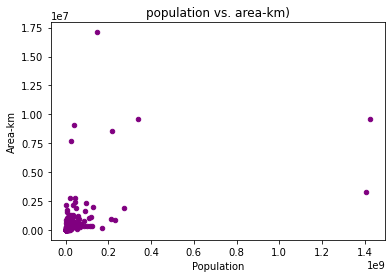

In [18]:
# plotting a scatterplot (population vs. area ($km^2$))
val = df.groupby("Country").sum().plot.scatter(title = 'population vs. area-km)', x = 'Population', y = 'Area-km', color ='purple')
val